<a href="https://colab.research.google.com/github/gaurav4601/capstoneproject2/blob/master/Yes_Bank_Price_ML_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img title="Almabetter" alt="Almabetter" src="https://pbs.twimg.com/profile_images/1649033540149866497/tg4B3SVf_400x400.jpg" width=70px>

## Yes Bank Stock Closing Price Predictor
<img title="Yes Bank" alt="Yes Bank Logo" src="https://logos-download.com/wp-content/uploads/2016/06/Yes_Bank_logo.png" width=120px>


#### **About Project** :
>The Indian financial domain has long been aware of Yes Bank, a prominent bank that has been the subject of much discussion since 2018, due to a fraudulent scheme involving Rana Kapoor. This illicit activity raises a pertinent question about how this event has affected the bank's stock prices, and whether reliable predictive models, such as Time series models, can accurately reflect such situations.
Our dataset includes monthly stock prices of Yes Bank since its inception, encompassing essential information regarding the closing, starting, highest, and lowest stock prices of each month. The primary objective of this study is to investigate and forecast the stock's closing price for each period, utilizing a range of analytical methods for the most accurate results.

<br>
<hr>
<br>

#### **Little Bit😶‍🌫️ about Domain** 

>Stocks represent ownership of a publicly-traded company, which individuals and institutions can purchase in the form of shares. When you buy a share of a stock, you become a shareholder in that company and can potentially benefit from its success. The stock market, meanwhile, is where these publicly-traded companies' shares are bought and sold. It is a market where investors can trade stocks and profit from fluctuations in the stock's price.The stock price refers to the current trading price of a particular stock. This price is subject to change due to market demand, trading volume, company financial performance, and other macroeconomic factors, making the stock market a volatile and uncertain environment. The price may reflect the market's perceived value of the company, based on factors such as its financial performance, leadership, and growth potential.Overall, stock prices and shares are essential components of the stock market, which serves as a venue for investors to buy and sell stocks and generate profits. Companies may benefit from the sale of stocks by raising capital to fund expansion and operations or to finance new projects.

<img text='illustration' src='https://img.freepik.com/free-vector/hand-drawn-stock-market-concept-with-analysts_23-2149163670.jpg?w=900&t=st=1683438353~exp=1683438953~hmac=8b0a3826b6bc810e5f5cc124fc72171ef9b0f84ccffa76196b2fd6a0ab0e3a7e' width=350px>

In [ ]:
# importing all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#additional as required

import plotly.graph_objs as go 
import plotly.io as pio

# set the default template for all Plotly Express charts to 'plotly_white'
pio.templates.default = 'plotly_white'


>**Data Loading from CSV**

In [ ]:
# loading csv file directly from the github-raw

data = pd.read_csv('https://raw.githubusercontent.com/gaurav4601/capstoneproject2/master/data_YesBank_StockPrices.csv')

#copy data to df

df = data.copy()

### 🏛️  **First Lookup Over Data**

In [ ]:
# head
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#last rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#shape of data
df.shape

(185, 5)

In [ ]:
# sample

df.sample(5)

,Date,Open,High,Low,Close
152,Mar-18,320.70,325.80,285.10,304.90
28,Nov-07,44.40,50.98,40.02,46.18
123,Oct-15,146.96,155.94,141.73,151.82
57,Apr-10,50.67,59.48,48.80,57.10
83,Jun-12,65.45,70.60,62.14,67.83


In [ ]:
# duplicate values

df.duplicated().sum()

0

In [ ]:
# check for null or missing values
print(df.isnull().sum())
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# number summary of dataset

df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### **Notes from First Lookup Over Data**

- We have 185 rows and 5 columns
- No null / Duplicate or Missing Values are thier in Dataset
- All Columns are in Proper Data Types....We May Consider Date Column to Convert Into ```datetime``` as per requirement



<br>
<br>

> **Columns Information**

In the stock market, the terms "open", "high", "low", and "close" refer to different prices of a stock or security at various points in time.

> **Open** refers to the price of a security at the beginning of a trading session, typically the first few minutes of trading.

> **High** refers to the highest price that a security reached during a trading session, whether it was in the opening minutes or later in the day.

> **Low** refers to the lowest price that a security reached during a trading session, whether it was in the opening minutes or later in the day.

> **Close** refers to the price of a security at the end of a trading session, typically at the close of the stock market.

These four terms are commonly used to describe the performance of a stock or security over a particular time period, such as a day, week, or month. The difference between the open and close prices is often used to calculate the daily return of a stock or security, while the difference between the high and low prices is used to measure its volatility or range for the day.


## **Data Wrangling**

>**Data wrangling**, also known as ```data munging```, is the process of cleaning, transforming, and mapping raw data into a usable and structured format for further analysis. It involves various techniques such as data cleaning, data transformation, data normalization, data aggregation, and data enrichment.

Here are the top 5 objectives of data wrangling:

- ```Cleaning data``` : Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and errors in data. The primary objective of data cleaning is to ensure the accuracy and completeness of the data.

- ```Transforming data``` : Data transformation involves converting the format or structure of data to make it more usable for analysis. The objective of data transformation is to create a more structured dataset that can be easily analyzed and interpreted.

- ```Integrating data``` : Data integration involves combining data from multiple sources to create a more comprehensive dataset. The objective of data integration is to provide a more complete view of the data and enable more accurate analysis.

- ```Normalizing data``` : Data normalization is the process of organizing data in a consistent and standardized format. The objective of data normalization is to reduce redundancy, improve data consistency, and ensure that data is correctly interpreted and analyzed.

- ```Enriching data``` : Data enrichment involves adding additional data or metadata to existing datasets to provide additional insights or context. The objective of data enrichment is to improve the quality and usefulness of data for analysis and decision-making.

> **Note**

> As per First Lookup Stage We observed that no **```Missing / Duplicated / Null Values```** are their in Dataset

  so we can skip ```Data Wrangling``` this step as of now if needed we will look at it



### **Data Types And Fixing**

Handling data types is an important aspect of machine learning projects. Here are three points that highlight its importance:

- Compatibility with ML algorithms: Machine learning algorithms have different requirements for data types. For instance, some algorithms work better with numerical data, while others work better with categorical data. Thus, it is important to handle data types to ensure that the data is compatible with the chosen algorithm.

- Data quality and accuracy: Incorrect data types can lead to incorrect predictions and inaccurate results. For instance, if a categorical variable is treated as a numerical variable, it may lead to wrong conclusions. Handling data types helps to ensure that the data is accurate and of good quality, which in turn improves the accuracy of the machine learning model.

- Efficient data processing: Handling data types can also improve the efficiency of data processing. Different data types have different sizes and processing requirements. For example, numerical data types require less storage space and can be processed faster than string data types. Thus, handling data types can improve the speed and efficiency of data processing, making it easier to work with large datasets.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


> All Columns are in Correct Format and Data Type ....We will Cover ```Date``` column from object to DateTime for Exploring / Drilling Down Data 

In [ ]:
# Conver Date Column to Date Time dtype

df["Date"] = pd.to_datetime(df["Date"], format='%b-%y')
     

In [ ]:
# Confirming Dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


### **Feature Engineering**
> Feature engineering is the process of selecting, transforming, and creating new variables or features from existing data to improve the performance of machine learning models. It involves the identification of the most important variables and their relationships with the target variable, as well as the creation of new features that can capture complex patterns in the data.

In [ ]:
# extract a month and year from the Date Column

df['Month'] = df.Date.dt.month_name()
df['Year'] = df.Date.dt.year

In [ ]:
df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,July,2005
1,2005-08-01,12.58,14.88,12.55,13.42,August,2005
2,2005-09-01,13.48,14.87,12.27,13.30,September,2005
3,2005-10-01,13.20,14.47,12.40,12.99,October,2005
4,2005-11-01,13.35,13.88,12.88,13.41,November,2005


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Month   185 non-null    object        
 6   Year    185 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 10.2+ KB


## **EDA :Exploratory Data Analysis**
> EDA is cruitial part of any Data Science Project . 


> **“If you torture the data long enough, it will confess to anything”** -
>
> -- <cite> Ronald H. Coase, a renowned British Economist</cite>

In [ ]:
#line chart for prices to observer trend

fig = px.line(df,x='Date',y='Close')
fig.update_layout(title='Yes Bank Stock Closing Price Trend 2005-2020')


fig.show()

> As we have time series data we can plot line chart to show the trend over a period

> Key Takeway : As per trend we can see that Stock Marginally Rises From 2015 - 2018....And Sharp Fall notice after 2018

> we can further goes down into the Month Trend of 2017 /2018

In [ ]:
#looking for trend in 2017 and 2018

_2017 = df.query('Year == 2017')
_2018 = df.query('Year == 2018')

In [ ]:
fig = px.line(_2017,x='Month',y='Close')
fig.update_layout(title='Monthly Trend in 2017')
fig.show()

In [ ]:
fig = px.line(_2018,x='Month',y='Close')
fig.update_layout(title='Monthly Trend in 2018')
fig.show()

> Looks like stock is being Volatile in Early 2017... Hit High of ~360 Rs
but in whole 2018 sharp downfile noticed and and never goes upwards then forward


> This is time of Explosition of Scam in YesBank by Founder Rana Kapoor

[Recent News Article ]('https://www.ndtv.com/india-news/yes-bank-fraud-rs-5-000-crore-fraud-by-yes-banks-rana-kapoor-wadhawans-probe-agency-2913012')

### Checking for outliers in Dataset

 > An outlier in data is a data point that is significantly different from other data points in the same dataset. Outliers can occur for various reasons, such as measurement errors, data processing errors, or genuine variability in the data. Outliers can have a significant impact on data analysis and modeling, as they can distort statistical measures such as the mean and standard deviation and affect the accuracy and validity of machine learning models. Outliers can also affect the interpretation of data by leading to incorrect conclusions about the relationships between variables. 

In [ ]:
# fig = px.box(df[['Open','High','Low','Close']],title='Box Plot For Oulier Detection')
# fig.show()


import plotly.graph_objs as go

# create a list of boxes
boxes = ['Open', 'High', 'Low', 'Close']

# set the colors for each box
colors = ['blue', 'orange', 'green', 'red']

# create a list of traces
traces = []

# loop through each box and create a Box object with a different color
for i in range(len(boxes)):
    trace = go.Box(
        y=df[boxes[i]],
        name=boxes[i],
        marker=dict(color=colors[i])
    )
    traces.append(trace)

# create the layout object and set the title
layout = go.Layout(title='Box Plot For Oulier Detection', paper_bgcolor='rgba(255, 255, 255, 0)',
    plot_bgcolor='rgba(255, 255, 255, 0)')

# create the figure object and plot the traces
fig = go.Figure(data=traces, layout=layout)
fig.show()



> Looks like their are some outliers in the dataset in each column we can further look for the handling this .....As we are trying to build a model that will predict the expected closing price i.e. regression we know that regression algorithms are affected by the outliers

    *outliers are not that big ...let's look

> Note: We have to look for the impact of this outliers on out model performance

In [ ]:
# we can check for all time high , low open and close price 
#import prettytable 
!pip install prettytable -q
from prettytable import PrettyTable



def high_low_yearwise(year):
  '''expected a year value e.g 2005 return High and Low Touch in that Year'''
  if year in list(df.Year.unique()):
    table = PrettyTable()
    table.field_names = ['SR','Columns Name','HIGH','LOW']
    
    temp_df = df[df.Year == year]
    for index,column in enumerate(temp_df.columns.to_list()[1:5]):
      table.add_row([index+1,column,temp_df[column].max(),temp_df[column].min()])

    print('Data for the Year :',year)
    print(table)


    fig = px.line(temp_df,x='Month',y='Close')
    fig.update_layout(title='Monthly Trend of Closing Price for {}'.format(year),width=500,height=300)
    
    # Remove grid lines
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)

    fig.show()

  else:
    return 'Data Not Available please check date'


In [ ]:
high_low_yearwise(2017)

Data for the Year : 2017
+----+--------------+--------+--------+
| SR | Columns Name |  HIGH  |  LOW   |
+----+--------------+--------+--------+
| 1  |     Open     | 363.0  | 231.98 |
| 2  |     High     | 383.25 | 284.31 |
| 3  |     Low      | 345.5  | 226.3  |
| 4  |    Close     | 361.96 | 279.1  |
+----+--------------+--------+--------+


### Following UBM Rule 
#### Univariate Analysis

```Close``` is the Target Variable 



Will First Check the Distribution of each of the Numerical Column


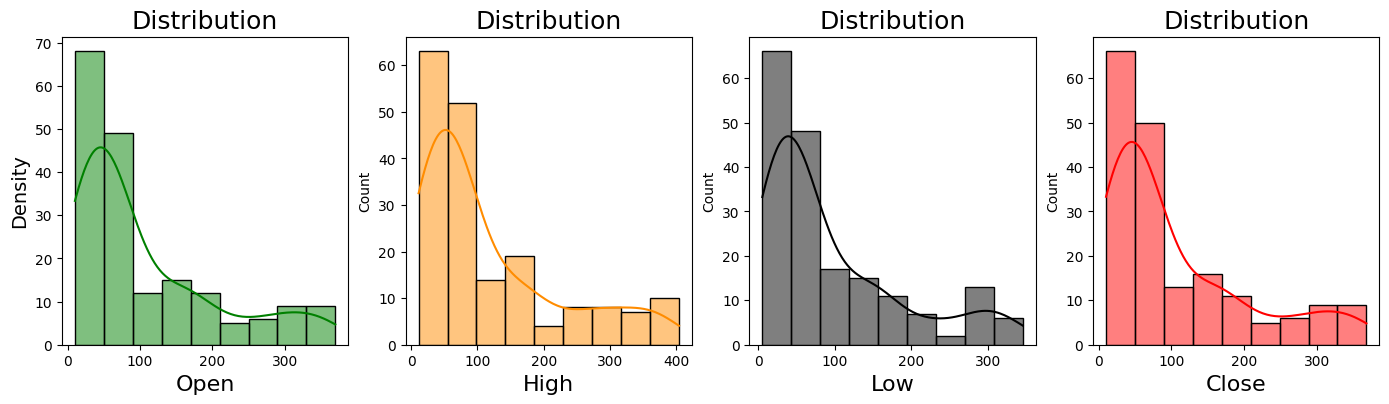

In [ ]:

plt.figure(figsize = (17,4))

plt.subplot(1, 4, 1)

sns.histplot(df['Open'], color = 'Green',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 4, 2)
sns.histplot(df['High'], color = 'Darkorange',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 4, 3)
sns.histplot(df['Low'], color = 'black',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.subplot(1, 4, 4)
sns.histplot(df['Close'], color = 'Red',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Close', fontsize= 16)

plt.show()

> Most of the Columns are skewed towards right skewed


There are two types of skewness :

```Positive Skewness``` : A data distribution is said to be positively skewed if the tail on the right-hand side of the distribution is longer or fatter than the tail on the left-hand side.

This indicates that the majority of the data is concentrated on the left side of the distribution and the values on the right-hand side are more spread out.
```Positive skewness``` is also called right skewness.
For example, a distribution of income might be positively skewed because there are more people with lower income than with higher income.


```Negative Skewness```: A data distribution is said to be negatively skewed if the tail on the left-hand side of the distribution is longer or fatter than the tail on the right-hand side.

This indicates that the majority of the data is concentrated on the right side of the distribution and the values on the left-hand side are more spread out.
```Negative skewness``` is also called left skewness.
For example, a distribution of reaction times might be negatively skewed because most reaction times are quick and there are a few participants with slow reaction times.

In [ ]:
#under standing the skewness of the data 

for col in df.columns.to_list()[1:5]:
  skew = df[col].skew()
  if skew > 0:
    print(f'{col} is Right Skew')
  else:
    print(f'{col} is Left Skew')
  


Open is Right Skew
High is Right Skew
Low is Right Skew
Close is Right Skew


#### **Transforming Data**  and Exploring 

Transformation of data is an integral part of Machine Learning and Data Science. It involves converting raw data from its original format into a new format that is suitable for analysis by an ML model. This is done to make the data more meaningful and to increase the accuracy of the model.


We can go with ```Function Transformer``` or ```Power Transformer```
We'll check for most of them

In [ ]:
from sklearn.preprocessing import power_transform

Open is Left Skew -0.004475429626523422
High is Left Skew -0.003612799249362852
Low is Left Skew -0.007604481459809922
Close is Left Skew -0.004394947665483125


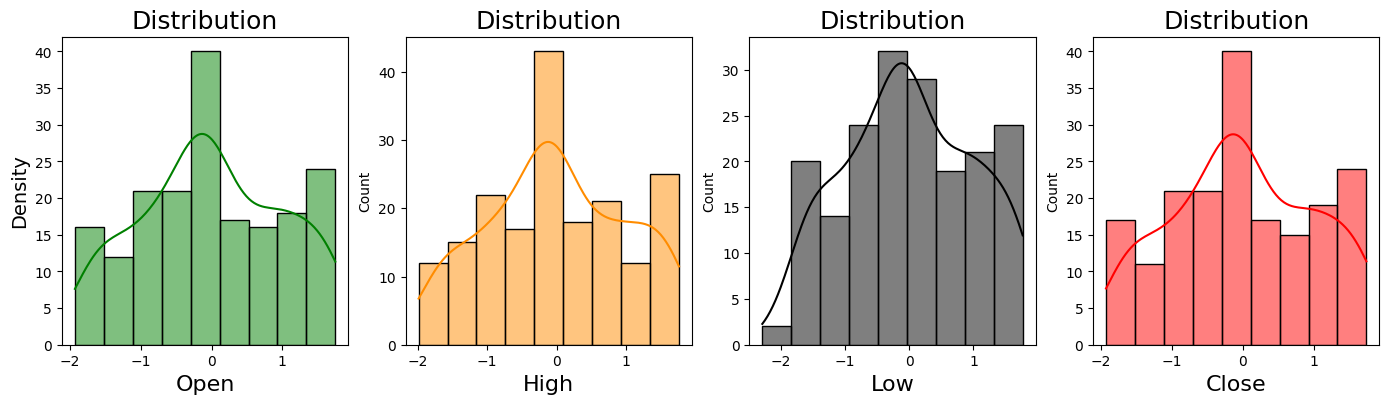

In [ ]:
#implementing power tranformation box-cox tranformation

temp_df = pd.DataFrame(power_transform(df[df.columns.to_list()[1:5]],method='box-cox'),columns=df.columns.to_list()[1:5])

for col in temp_df.columns.to_list():
  skew = temp_df[col].skew()
  if skew > 0:
    print(f'{col} is Right Skew {skew}')
  else:
    print(f'{col} is Left Skew {skew}')



plt.figure(figsize = (17,4))

plt.subplot(1, 4, 1)

sns.histplot(temp_df['Open'], color = 'Green',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 4, 2)
sns.histplot(temp_df['High'], color = 'Darkorange',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 4, 3)
sns.histplot(temp_df['Low'], color = 'black',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.subplot(1, 4, 4)
sns.histplot(temp_df['Close'], color = 'Red',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Close', fontsize= 16)

plt.show()

**After Applying the boc-cox tranformation**

- Open is Left Skew -0.004475429626523422
- High is Left Skew -0.003612799249362852
- Low is Left Skew -0.007604481459809922
- Close is Left Skew -0.004394947665483125

> Almost Normal Distribution we are getting after applying the box-cox

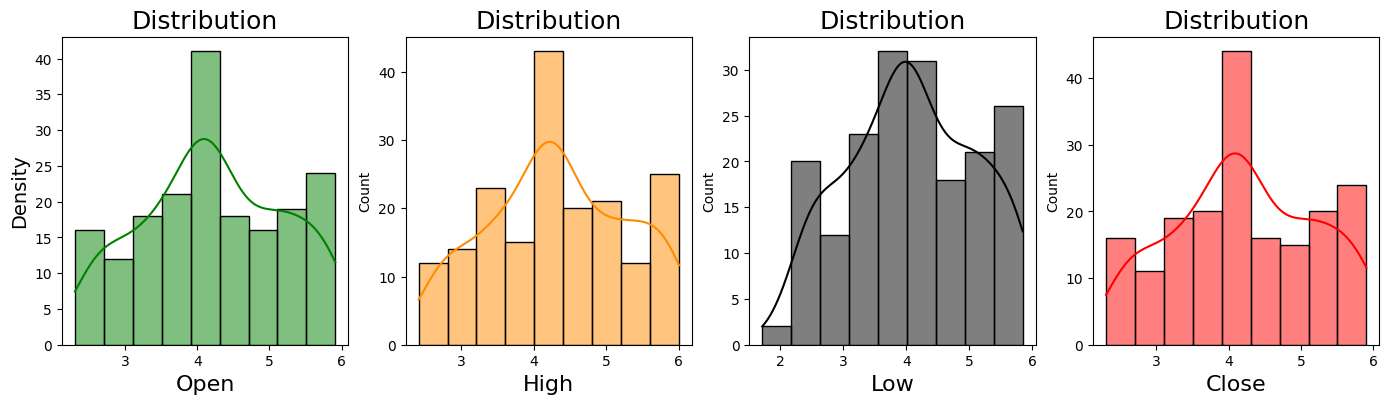

In [ ]:
### function tranformation log tranformation 

plt.figure(figsize = (17,4))

plt.subplot(1, 4, 1)

sns.histplot(np.log(df['Open']), color = 'Green',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 4, 2)
sns.histplot(np.log(df['High']), color = 'Darkorange',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 4, 3)
sns.histplot(np.log(df['Low']), color = 'black',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.subplot(1, 4, 4)
sns.histplot(np.log(df['Close']), color = 'Red',kde=True)
plt.title('Distribution', fontsize=18)
plt.xlabel('Close', fontsize= 16)

plt.show()

> similar type of distribution from both the tranformation ....We can try to scale the data also

In [ ]:
def pairplot(year=list(df.Year.unique())):
  '''expected list of year as argument and return pairplot for that period'''

  # pairplot
  sns.pairplot(df[df['Year'].isin(year)],vars=['Open', 'High', 'Low', 'Close'],hue='Year',palette='deep')



  title_font = {'size': '20', 'color': 'Black', 'weight': 'bold', 'verticalalignment': 'middle'}
  title = 'For Years '+ ','.join([str(x) for x in year])
  plt.suptitle(title,fontdict=title_font,horizontalalignment='center',fontfamily='monospace')



  # add top margin to the plot
  plt.subplots_adjust(top=0.9)

  plt.show()
  # df

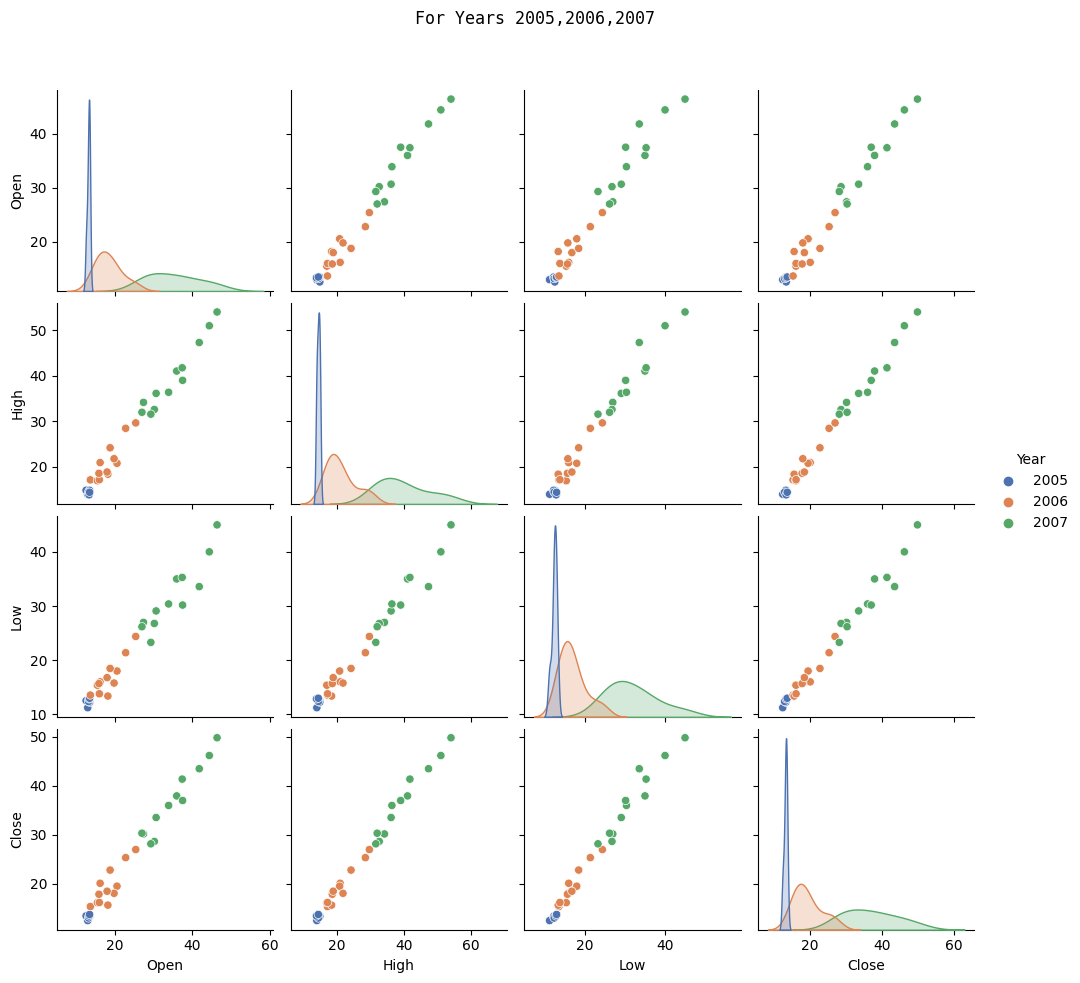

In [ ]:
#understanding relatioship between the columns in initial year
pairplot([2005,2006,2007])

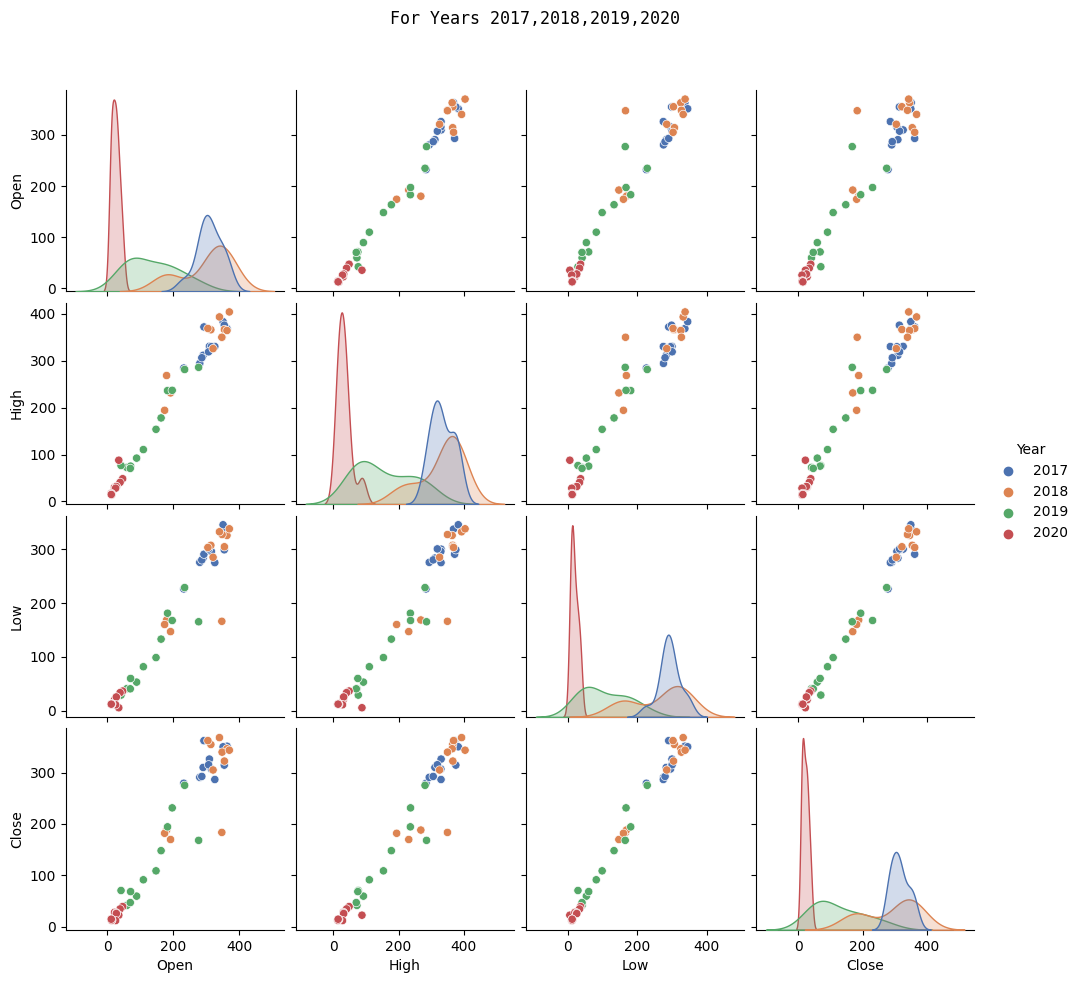

In [ ]:
#understanding relatioship between the columns in scan exporsure years
pairplot([2017,2018,2019,2020])

> Intial year has so what explainable or natural kind of pattern 
> But after exposure of scam or just before there is quiet different behaviour

### ⛩️ Correlation between the Variables

  In machine learning, correlation refers to the statistical relationship between two or more variables. Correlation is a measure of the extent to which two variables are related to each other. 

In [ ]:



fig = px.imshow(df[['Open', 'High', 'Low', 'Close']].corr(), text_auto=True,color_continuous_scale='RdBu_r')
# Set the title of the plot
fig.update_layout(title='The Correlation Plot ')
fig.show()

> The Every Independannt Variable should be highly correlation with the Dependant Varible ....But should not have high correlation amongs them

> Seems like their is ```multicollinearity```  in between the independant varibles

Multicollinearity can be measured using various methods, including:

```Correlation matrix```: A correlation matrix can be used to identify the correlation between pairs of independent variables. A correlation coefficient close to +1 or -1 indicates a high correlation, which may suggest the presence of multicollinearity.

```Variance inflation factor (VIF)```: VIF measures how much the variance of the estimated regression coefficient of an independent variable is inflated due to multicollinearity. A VIF value greater than 1 indicates the presence of some degree of multicollinearity, and a VIF value greater than 5 or 10 is often used as a threshold for identifying problematic levels of multicollinearity.

```Eigenvalues```: Eigenvalues can be obtained from the correlation matrix, and a high value indicates that a linear combination of the independent variables can explain a large amount of variance. If the largest eigenvalue is much greater than 1, it may suggest the presence of multicollinearity.

```Condition number```: The condition number is the ratio of the largest eigenvalue to the smallest eigenvalue, and a large condition number suggests the presence of multicollinearity.

> ### We'll Measure the Measure of Multicollinearity using VIF

**KEY TAKEAWAYS**
1. A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
2. Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 
3. A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [ ]:
#importing libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Select the independent variables
X = df[df.columns.to_list()[1:4]]


# Add a constant term to the independent variables (for intercept)
X = sm.add_constant(X)


# Fit an ordinary least squares (OLS) regression model
model = sm.OLS(data['Close'], X).fit()


# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns

# Print the results
print(vif)

   VIF Factor Features
0    2.239276    const
1   81.926279     Open
2   79.199072     High
3   34.563462      Low


> As of Now we 're not dropping or handiling multicollinearity ....we will come again and rebuild our model ...in way of handling mutlicollearity 

## **Model Development**

<hr>
<hr>


<img src='https://www.krasamo.com/wp-content/uploads/0730Building-ML-Models.jpg'  height='250px' />



<hr>

**Model Development** refers to the process of creating and building machine learning models that can make predictions or decisions based on input data. This process involves several steps:

**Data preparation**: This step involves collecting and preparing the data for use in training the model. This can include tasks such as data cleaning, feature engineering, and splitting the data into training and testing sets.

**Model selection**: This step involves choosing an appropriate machine learning algorithm or model architecture based on the problem at hand and the available data.

**Model training**: This step involves using the training data to train the selected model. This typically involves adjusting the model parameters to minimize the difference between the predicted outputs and the actual outputs.

**Model evaluation**: This step involves evaluating the performance of the trained model using the testing data. This can involve measuring various performance metrics such as accuracy, precision, recall, and F1 score.

**Model optimization**: This step involves optimizing the model performance by adjusting various hyperparameters and model parameters.

**Model deployment**: This step involves deploying the trained model to a production environment where it can be used to make predictions on new data.

<hr>



In [ ]:
# importing necessary libraries for model developement

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#data transformation 
scalar = StandardScaler()



In [ ]:
print('Our independant variables are ' + ', '.join(df.columns.to_list()[1:4]))
print('Our dependant variables are '+ df.columns.to_list()[4])

X = df[['Open','High','Low']]
y = df['Close']

Our independant variables are Open, High, Low
Our dependant variables are Close


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Print the size of each set
print("Number of samples in training set: ", X_train.shape)
print("Number of samples in test set: ", X_test.shape)
print("Number of samples in training set: ", y_train.shape)
print("Number of samples in test set: ", y_test.shape)

Number of samples in training set:  (148, 3)
Number of samples in test set:  (37, 3)
Number of samples in training set:  (148,)
Number of samples in test set:  (37,)


In [ ]:
# fit the scaler to the data and transform it
# fit and transform the X_train but only traform on y_trian to reduce biasness


X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


## We'll Try to build most of the regression model on the dataset

- Linear regression
- Ridge Regression
- Lasso Regression
- Elastic Net Regression
- SGDRegressor
- KNN
- Decision Tree
- SVM
- Random Forest
- ExtraTrees
- AdaBoost
- Gradient Boost
- XgBoost
- Voting Regressor
- Stacking

In linear regression, some commonly used evaluation metrics are:

Mean Squared Error (MSE): The average of the squared differences between the predicted values and the true values. A lower MSE indicates better performance.

Root Mean Squared Error (RMSE): The square root of the MSE. RMSE is easier to interpret than MSE, as it is in the same unit as the target variable.

Mean Absolute Error (MAE): The average of the absolute differences between the predicted values and the true values. MAE is less sensitive to outliers compared to MSE.

R-squared (R2): The proportion of variance in the target variable that is explained by the independent variables in the model. R2 ranges from 0 to 1, with a higher value indicating better performance.

Adjusted R-squared: A modified version of R2 that takes into account the number of independent variables in the model. Adjusted R2 penalizes the addition of unnecessary variables that do not improve the model's performance.

Residual Standard Error (RSE): The standard deviation of the residual errors (the difference between the predicted values and the true values). A lower RSE indicates better performance.

Mean Absolute Percentage Error (MAPE): The average of the absolute percentage differences between the predicted values and the true values. MAPE is commonly used when the scale of the target variable is large.

Mean Percentage Error (MPE): The average of the percentage differences between the predicted values and the true values. MPE is commonly used when the scale of the target variable is small.

In [ ]:
# all the imports 

#evaluation metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#algorihtms
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

<hr>

### Simple Linear Regression

    

<hr>

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test_scaled)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9904142726548665
MAE 5.812554509942107


In [ ]:
y_pred = lr.predict(X_train_scaled)
print('R2 score',r2_score(y_train,y_pred))
print('MAE',mean_absolute_error(y_train,y_pred))

R2 score 0.9961188216222026
MAE 3.711670232995017
